# Final comparison over all modules

In [1]:
#Libraries
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import subprocess
import numpy as np

In [2]:
#Name Lists
stencil_name_list = [
        #"test",
        #"laplacian1d", 
        #"laplacian2d",
        "laplacian3d",
        #"FMA",
       "lapoflap1d",
        "lapoflap2d",
        "lapoflap3d",
        #"test_gt4py",
    ]

backend_list = [#"numpy", 
                #"numba_vector_function", 
                #"numba_vector_decorator", 
                #"numba_loop", 
                #"numba_stencil", 
                "gt4py",
                #"cupy",
                #"numba_cuda"
               ]

gt4py_backend_list = [
        #"numpy", 
        #"gtx86", 
        #"gtmc", 
        "gtcuda"
]

In [7]:
!module unload PyExtensions/3.6.5.7-CrayGNU-19.10

In [ ]:
#Parameter 
field_size_list = [8,16,32,64,128,256,512]
df_name = "gt4py_gtcuda_" #Name of evaluation dataframe
num_iter = 20

#timing
for x in stencil_name_list:
    print(x,':')
    for size in field_size_list:
        print(size,':')
        for y in gt4py_backend_list:
            print(y,':')
            bashCommand=f"/users/course17/HPC4WC_venv/bin/python stencil_main_performance.py --nx {size} --ny {size} --nz {size} --stencil_name {x} --backend gt4py --gt4py_backend {y} --num_iter 20 --df_name {df_name}"
            process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
            output, error = process.communicate()
            print(error)
            print(output.decode("utf-8"))

In [4]:
df_numba_stencil= pd.read_pickle("eval/{}.pkl".format("numba_stencil"))
df_GPU2= pd.read_pickle("eval/{}_result.pkl".format("GPU2"))
df_gt4py = pd.read_pickle("eval/{}_result.pkl".format("gt4py_all"))
df_numpy = pd.read_pickle("eval/{}_result.pkl".format("numpy"))

In [5]:
print("numba_stencil")
print(pd.unique(df_numba_stencil.backend))
print(pd.unique(df_numba_stencil.numba_parallel))

print("GPU")
print(pd.unique(df_GPU2.backend))
print(pd.unique(df_GPU2.gt4py_backend))

print("gt4py")
print(pd.unique(df_gt4py.backend))
print(pd.unique(df_gt4py.gt4py_backend))

print("numpy")
print(pd.unique(df_numpy.backend))

numba_stencil
['numba_stencil']
[False True]
GPU
['gt4py' 'cupy' 'numba_cuda']
['gtcuda' 'numpy']
gt4py
['gt4py']
['gtx86' 'gtmc' 'gtcuda']
numpy
['numpy']


In [10]:
df1=df_numpy[df_numpy.nx!=1024]
df2=df_numba_stencil[((df_numba_stencil.numba_parallel==True) & (df_numba_stencil.nx!=1024))]
df3=df_GPU2[df_GPU2.numba_cudadevice==True].drop_duplicates(subset =["stencil_name","nx"], keep = "first", inplace = False)
df4=df_gt4py[df_gt4py.gt4py_backend == "gtx86"]
df5= df_gt4py[df_gt4py.gt4py_backend == "gtmc"]
df6=df_GPU2[df_GPU2.backend == "cupy"]
df7=df_gt4py[df_gt4py.gt4py_backend == "gtcuda"]

In [8]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7])
df =df.sort_values(["backend","stencil_name","nx"])
#df[df.nx==128].sort_values(["run_stdev"])

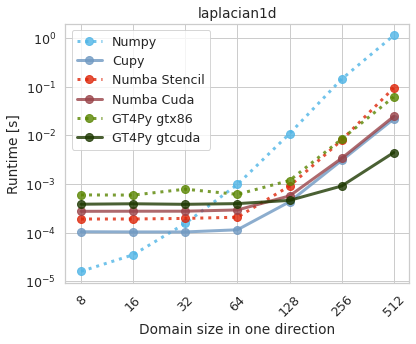

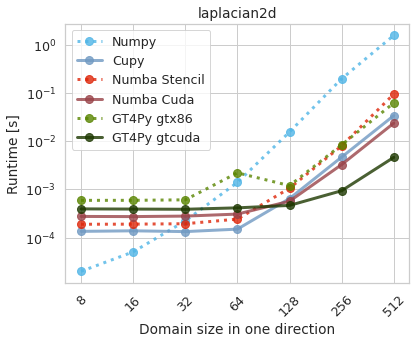

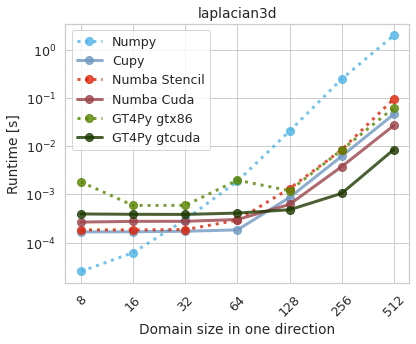

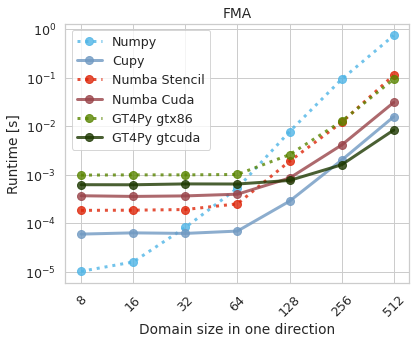

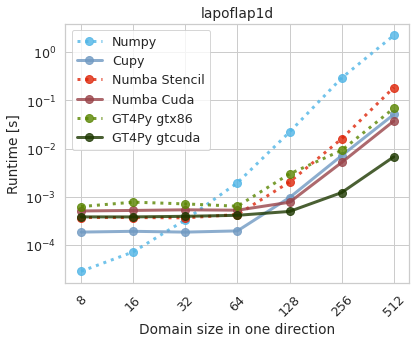

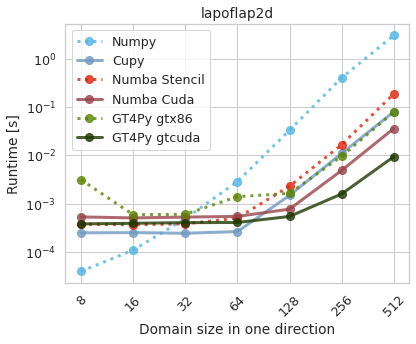

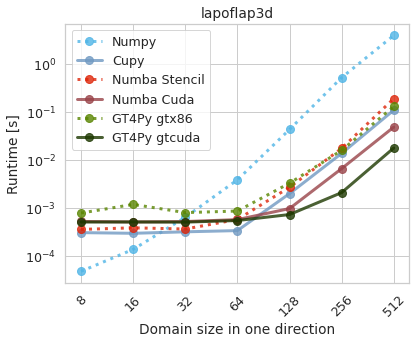

In [9]:
stencil_name_list = [
        "laplacian1d", 
        "laplacian2d",
        "laplacian3d",
        "FMA",
       "lapoflap1d",
        "lapoflap2d",
        "lapoflap3d",
    ]
gt4py_backend_list = [
        #"numpy", 
        "gtx86", 
        #"gtmc", 
        "gtcuda"
]
#image style
df_color=pd.DataFrame({'gtx86': "#598500",'gtmc': "#A87402",'gtcuda': "#1D3800",'cupy': "#7099c2", 'numba_cuda': "#994349", 
                       "numba_stencil": "#DE2509", "numpy": "#4FB5E6"},index=[0])
#df_marker=pd.DataFrame({'gtx86': "s",'gtmc': "s",'gtcuda': "v", 'numba_cuda': "o", "cupy": "o",
                        #"numba_stencil": "s", "numpy": "s"},index=[0])
df_linestyle = pd.DataFrame({'gtx86': ":",'gtmc': ":",'gtcuda': "-", 'numba_cuda': "-", "cupy": "-",
                        "numba_stencil": ":", "numpy": ":"},index=[0])
df_label_backend = pd.DataFrame({'gtx86': "GT4Py gtx86",'gtmc': "GT4Py gtmc",'gtcuda': "GT4Py gtcuda", 
                                 'cupy': "CuPy", 'numba_cuda': "Numba Cuda","cupy": "Cupy","numba_stencil": "Numba Stencil", 
                                 "numpy": "Numpy"},index=[0])

sns.set_context("notebook", font_scale=1.15, rc={"lines.linewidth": 2})   
with sns.axes_style("whitegrid"):
    for name in stencil_name_list:
        f = plt.figure(figsize=(6, 5))#figsize=(10, 7))
        for back in ["numpy","cupy","numba_stencil", "numba_cuda"]:
            df_sub= df[((df.stencil_name == name) & (df.backend == back))]
            xs=[0,1,2,3,4,5,6]
            plt.xticks(xs,(8,16,32,64,128,256,512))
            plt.xticks(rotation=45)
            plt.yscale("log")
            plt.plot(xs, df_sub['run_avg'], alpha =0.8,color = df_color[back][0],\
                label = df_label_backend[back][0], marker ="o", lw = 3, ms=8,linestyle=df_linestyle[back][0])
        for back in ["gt4py"]:
            for gt4py_back in gt4py_backend_list:
                df_sub= df[((df.stencil_name == name) & (df.backend == back) & (df.gt4py_backend == gt4py_back))]
                xs=[0,1,2,3,4,5,6]
                plt.xticks(xs,(8,16,32,64,128,256,512))
                plt.xticks(rotation=45)
                plt.yscale("log")
                plt.plot(xs, df_sub['run_avg'], alpha =0.8,color = df_color[gt4py_back][0],\
                    label = df_label_backend[gt4py_back][0], marker ="o", lw = 3, ms=8,linestyle=df_linestyle[gt4py_back][0])

        plt.xlabel("Domain size in one direction")
        plt.ylabel("Runtime [s]")
        plt.title(name)
        plt.legend()
        plt.tight_layout()

        plt.savefig('module_comparison'+name+'.png',dpi=300) 